Step 1 :Data Collection

In [134]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Haris Ali\Restaurant_Reviews.tsv', delimiter='\t',encoding='utf-8')
data.head()

(50000, 2)

Step 2 : Data Profiling

In [128]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
            Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


Step 3 : Data Quality

In [100]:
data_cleaned = data.drop_duplicates()
#Missing Values
print(data_cleaned.isnull().sum())


Review    0
Liked     0
dtype: int64


Step 4: Data Selection

In [103]:
X = data_cleaned['Review']
y = data_cleaned['Liked']

Step 5: Exploratory Data Analysis (EDA)

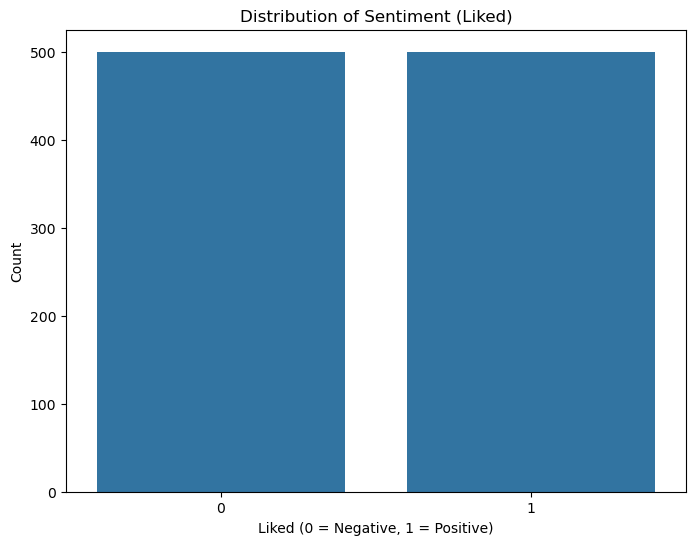

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'liked' column (sentiment)
plt.figure(figsize=(8, 6))
sns.countplot(x='Liked', data=data)
plt.title('Distribution of Sentiment (Liked)')
plt.xlabel('Liked (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()


Step 6: Selection of Features

In [111]:
data = data[['Review', 'Liked']]
print("\nSelected Data (Reviews and Liked):")
print(data.head())



Selected Data (Reviews and Liked):
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


Step 7: Selection of Model

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Step 8: Model Training

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization 
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Step 9: Model Tuning / Hyper-parameter Tuning


In [120]:
lr_model = LogisticRegression(random_state=42)


param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']}  # Regularization strength and penalty type
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2']},
             scoring='accuracy')

Step 10: Cross-validation

In [123]:
best_model = grid_search.best_estimator_

Step 11: Predict on the Test Set

In [126]:
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy on Test Set: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.78      0.73      0.76        94

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

